In [1]:
# IMPORT RELEVANT PACKAGES

import numpy as np
import pandas as pd
import os

#import geopandas as gdp - not sure why this doesn't import

import folium as flm
import seaborn as sns
import json


import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc,rcParams
import matplotlib.font_manager as font_manager
from matplotlib import cm



import itertools
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 

import numpy_financial as npf

!pip install geopandas
!pip3 install geopandas
!pip install --upgrade matplotlib

import matplotlib.patches as mpatches

from CEM_functions import *




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Outputs from CEM

### read in the results files

In [4]:
CEM_dir = ''
CEM_dir_index = 43

CEM_scenarios_dict = create_sensitivity_dict(CEM_dir)

CEM_min_hours_dict = create_UP_min_hours_dict(CEM_scenarios_dict,CEM_dir,CEM_dir_index)
results_df = pd.DataFrame(CEM_min_hours_dict[0]).T.reset_index()

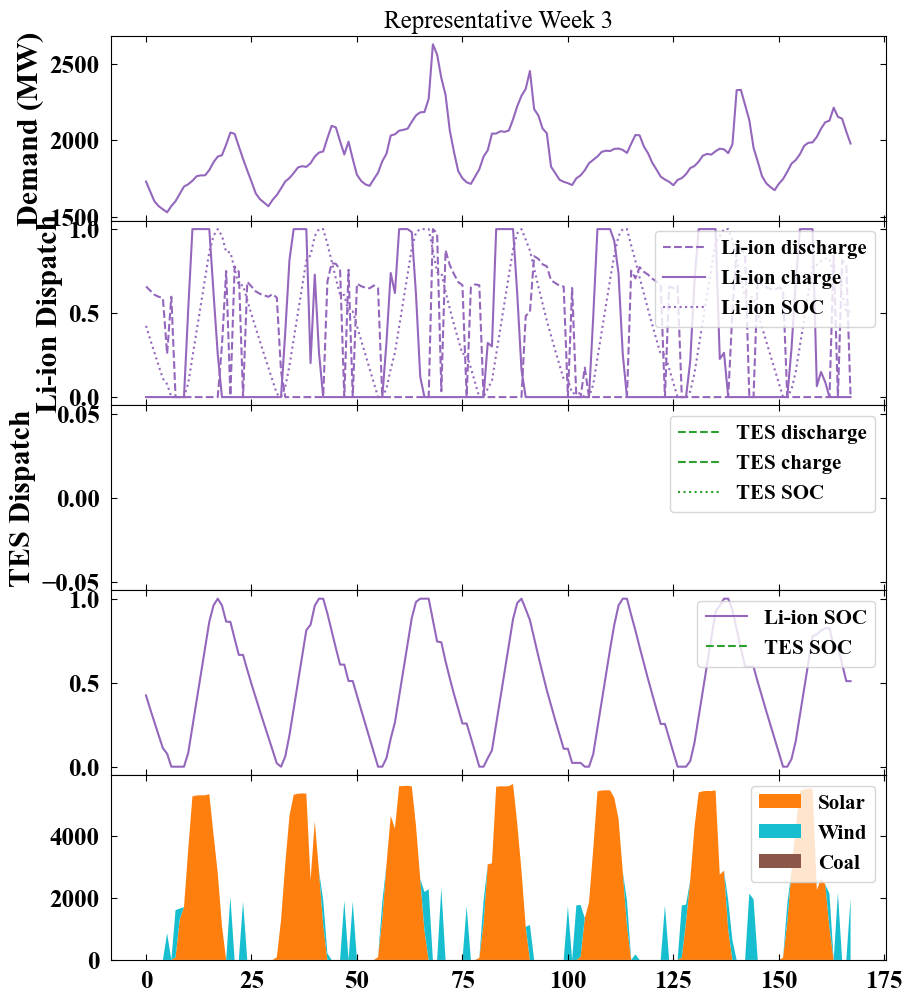

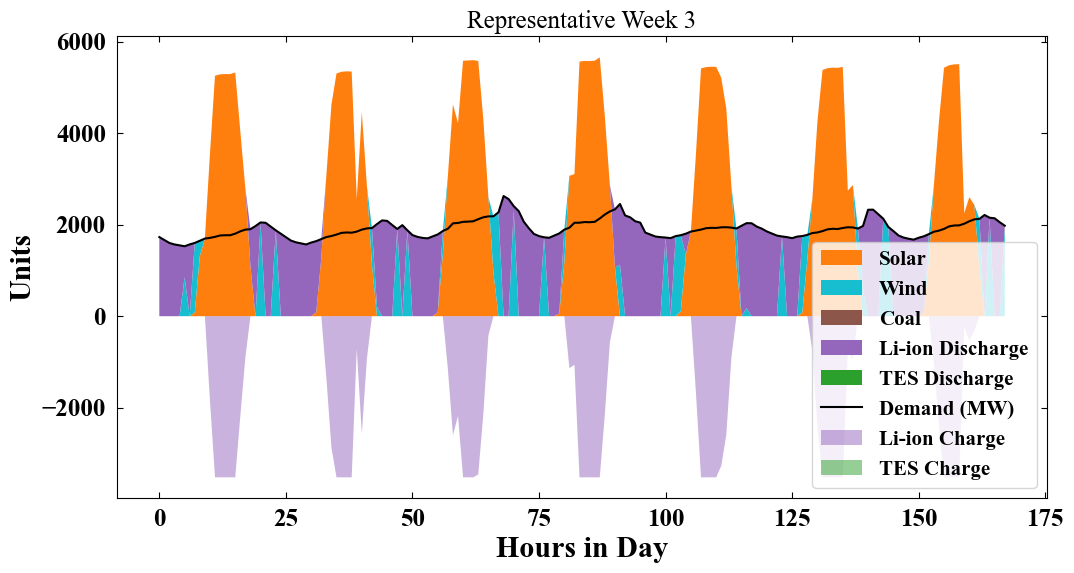

In [5]:
n=3
plot_dispatch_separate(n,results_df)
plot_dispatch(n,results_df)

/Users/serenapatel/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/GitHub/Thermal-Energy-System-Dispatch-and-Sizing-Optimization/TrombayU5_repweeks/RESULTS/CEM_storage_0/CEM_functions.py:333: RuntimeWarning: invalid value encountered in divide
  SOC_array = SOC_array + list(SOC_week / results_df["tank_energy_max"][0])


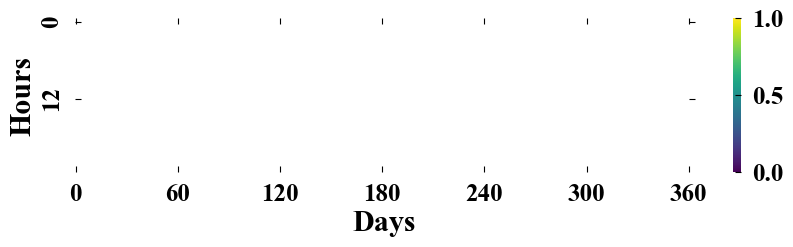

In [6]:
plot_storage_heatmap(results_df)

In [7]:
## make the dfs
curtailment_df = create_curtailment_df(CEM_min_hours_dict)
generation_df = create_generation_df(CEM_min_hours_dict)
capacity_df = create_capacity_df(CEM_min_hours_dict)
E_storage_df = create_E_storage_df(CEM_min_hours_dict)
P_storage_df = create_P_storage_df(CEM_min_hours_dict)
storage_dispatch_df = create_storage_dispatch_df(CEM_min_hours_dict)
conversions_df = create_conversions_df(CEM_min_hours_dict)

emissions_df = create_emissions_df(CEM_min_hours_dict)
syscost_df = create_syscost_df(CEM_min_hours_dict)



In [8]:
capacity_df[capacity_df.TES>0]

Label         Solar         Wind  Coal  \
0   ers/CEM_TES_storage140emissions0  11147.075985  4030.809740   0.0   
1    ers/CEM_TES_storage80emissions0  11140.619970  4073.449515   0.0   
3   ers/CEM_TES_storage180emissions0  11135.650291  4107.324373   0.0   
4    ers/CEM_TES_storage40emissions0  11140.834190  4072.367955   0.0   
8   ers/CEM_TES_storage200emissions0  11136.384448  4101.986281   0.0   
9    ers/CEM_TES_storage20emissions0  11131.425160  4131.814069   0.0   
11  ers/CEM_TES_storage20emissions10  11141.257142  4070.064383   0.0   
15   ers/CEM_TES_storage60emissions0  11141.465483  4068.813487   0.0   
17  ers/CEM_TES_storage100emissions0  11140.817650  4073.224854   0.0   
18  ers/CEM_TES_storage120emissions0  11142.447142  4064.257938   0.0   
19  ers/CEM_TES_storage160emissions0  11142.127948  4064.037750   0.0   

           TES       Li-ion  
0   362.114901  3221.835869  
1   333.089500  3223.294616  
3   330.020895  3224.524885  
4   338.972874  3223.280232  
8   323.165858  3224.309063  
9   244.705006  3225.130896  
11  353.713241  3223.234669  
15  355.407117  3223.200365  
17  355.156303  3223.360285  
18  371.422960  3223.175351  
19  350.432529  3223.009813

Text(64.33333333333333, 0.5, 'System Cost (USD/year)')

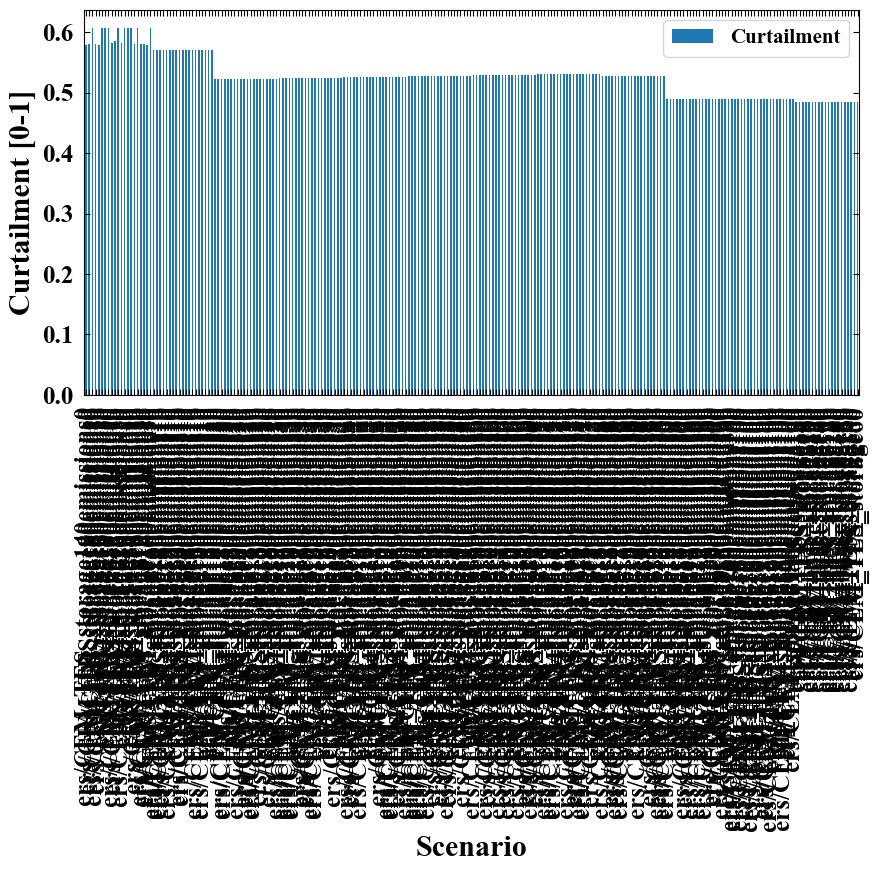

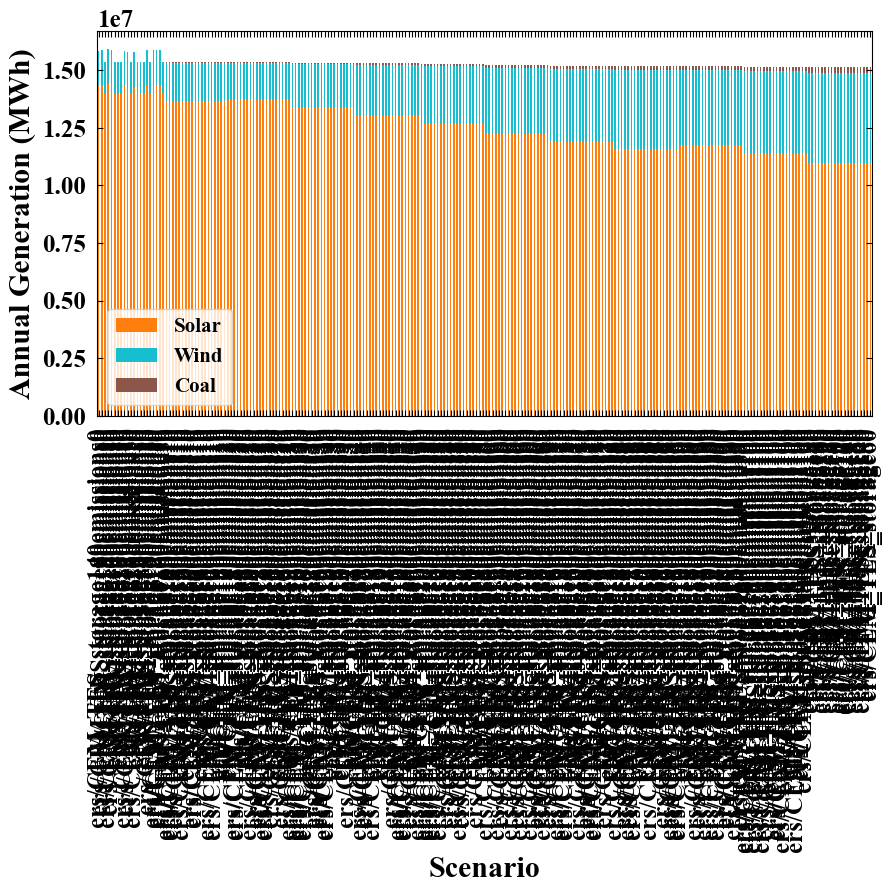

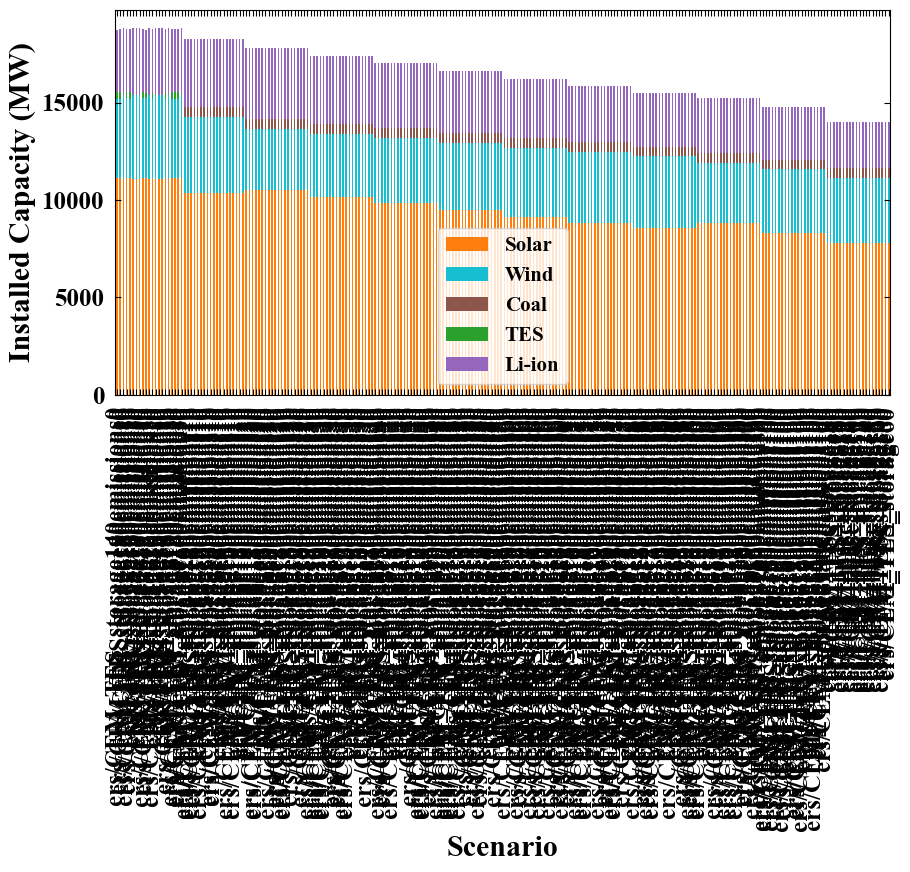

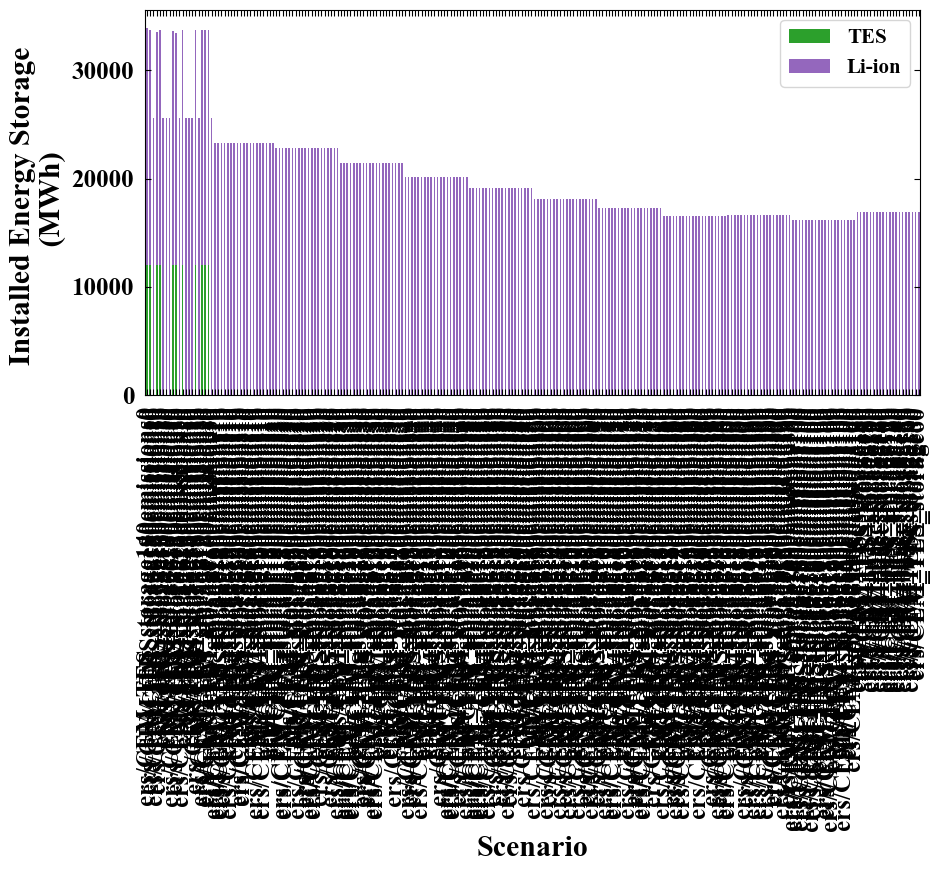

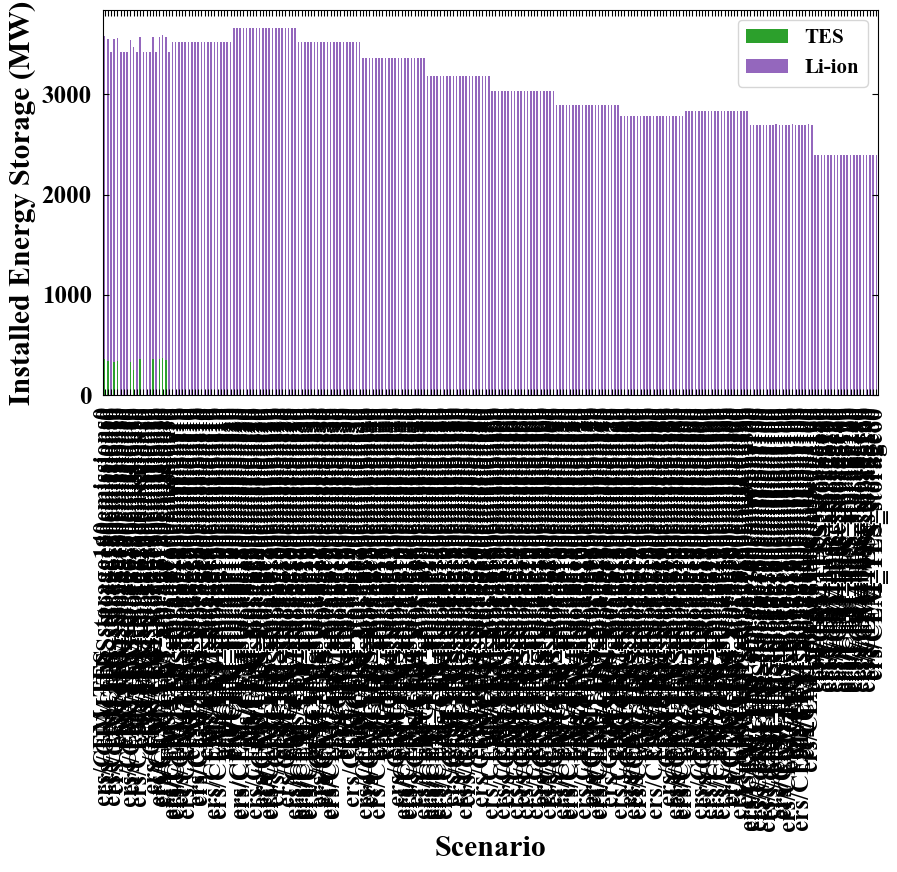

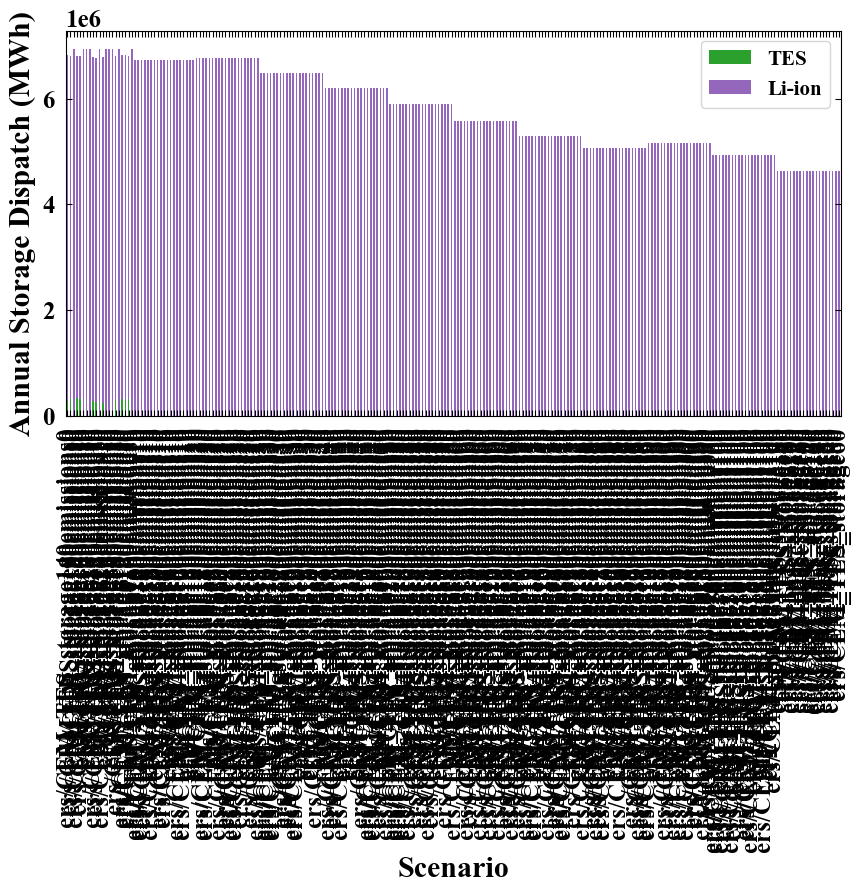

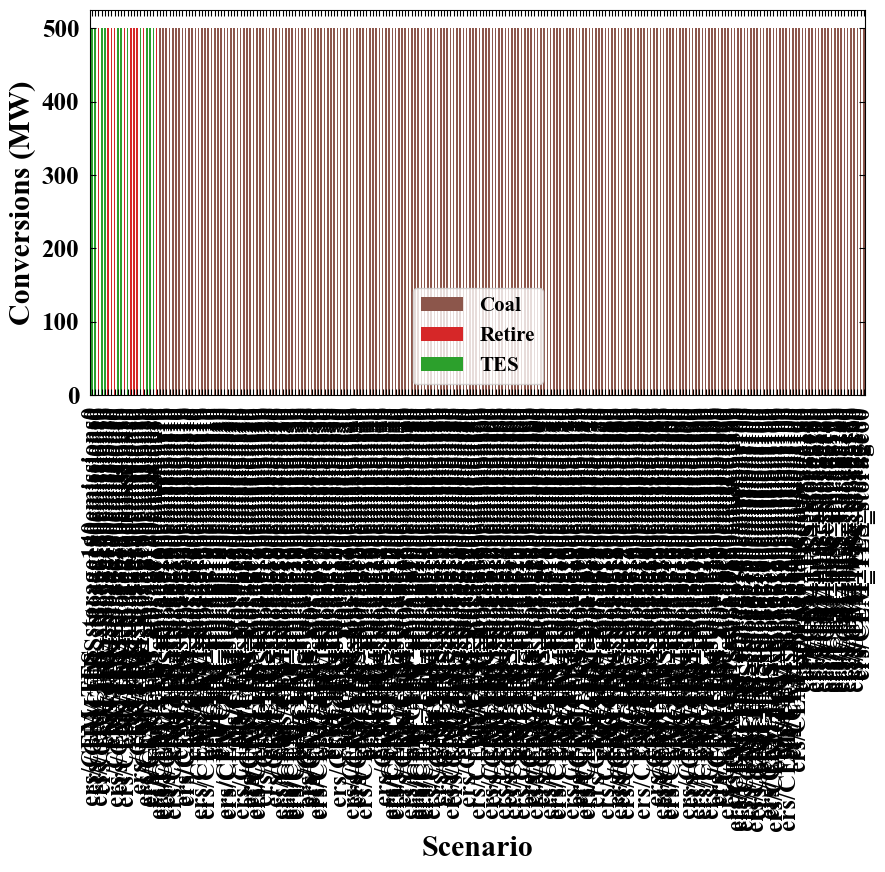

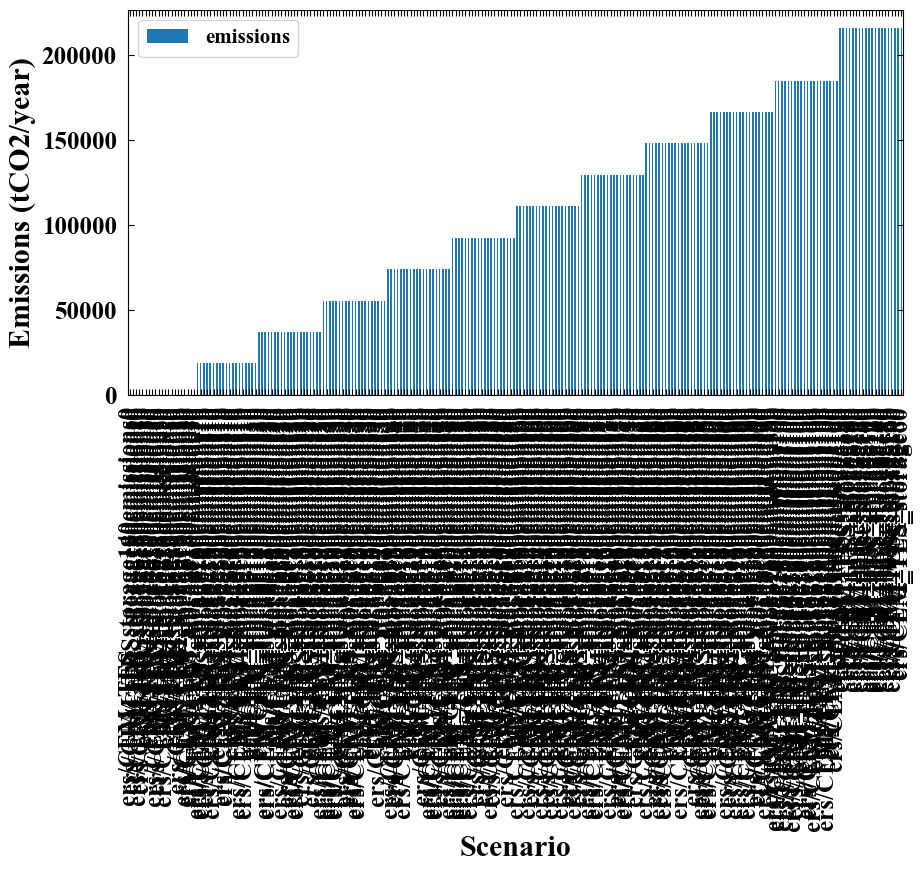

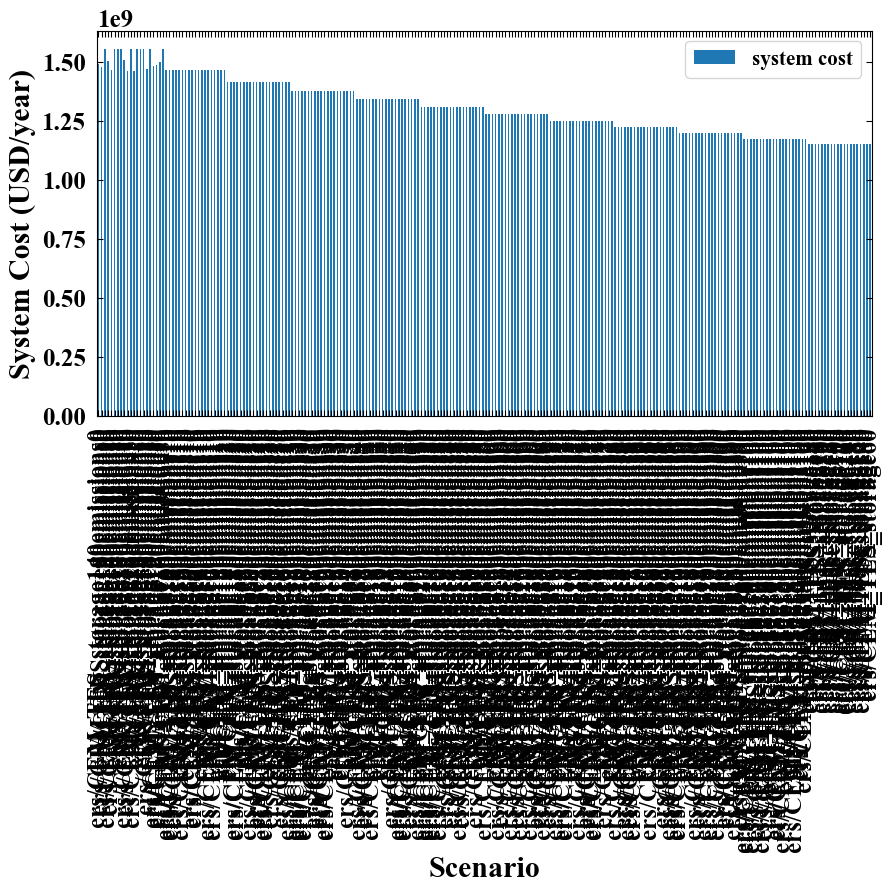

In [9]:
#plots 
plot_stacked(curtailment_df,'curtailment')
plt.ylabel('Curtailment [0-1]')


plot_stacked(generation_df,'generation')
plt.ylabel('Annual Generation (MWh)')

plot_stacked(capacity_df,'capacity')
plt.ylabel('Installed Capacity (MW)')


plot_stacked(E_storage_df,'e_storage')
plt.ylabel('Installed Energy Storage \n (MWh)')

plot_stacked(P_storage_df,'p_storage')
plt.ylabel('Installed Energy Storage (MW)')

plot_stacked(storage_dispatch_df,'storage_dis')
plt.ylabel('Annual Storage Dispatch (MWh)')

plot_stacked(conversions_df,'conversions')
plt.ylabel('Conversions (MW)')


plot_stacked(emissions_df,'emissions')
plt.ylabel('Emissions (tCO2/year)')

plot_stacked(syscost_df,'syscost')
plt.ylabel('System Cost (USD/year)')


## check if it's forced at intermediate steps check if its larger than objective function 

## under 0 emissions, 2-3 limits
## age, efficiency, reduced storage cost 

#flat case
## 4 plots 

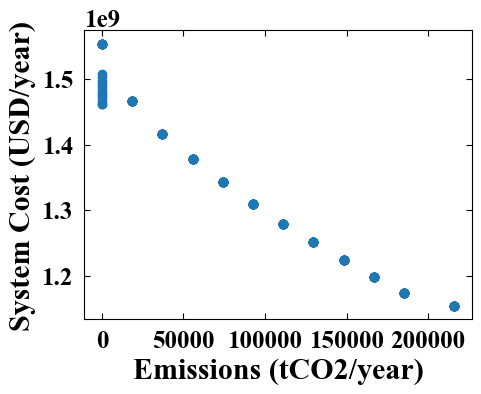

In [10]:
emissions_syscost_df=create_emissions_syscost_df(CEM_min_hours_dict)
plot_emissions_systemcost(emissions_syscost_df,'emissions_test')

Text(0.5, 1.0, 'LCOE')

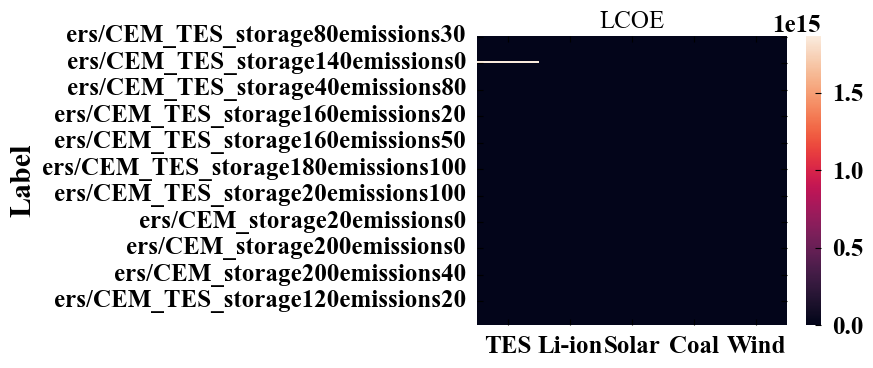

In [11]:
all_LCOE_df = create_LCOE_df(CEM_min_hours_dict)
sns.heatmap(all_LCOE_df.set_index('Label'))
plt.title('LCOE')

In [12]:
all_LCOE_df  #$/kWh

Label       TES    Li-ion     Solar  \
0     ers/CEM_TES_storage80emissions30  0.000000  0.014404  0.006997   
1    ers/CEM_TES_storage60emissions100  0.000000  0.014412  0.006244   
2               ers/CEM_base_storage40  0.000000  0.014882  0.006306   
3    ers/CEM_TES_storage120emissions60  0.000000  0.014307  0.006526   
4    ers/CEM_TES_storage140emissions80  0.000000  0.014397  0.006290   
..                                 ...       ...       ...       ...   
235  ers/CEM_TES_storage100emissions70  0.000000  0.014367  0.006401   
236   ers/CEM_TES_storage160emissions0  0.155962  0.014014  0.006341   
237            ers/CEM_base_storage180  0.000000  0.014882  0.006306   
238       ers/CEM_storage100emissions0  0.000000  0.014739  0.007315   
239   ers/CEM_TES_storage80emissions80  0.000000  0.014397  0.006290   

         Coal      Wind  
0    0.444631  0.028559  
1    0.240168  0.016432  
2    0.216842  0.015385  
3    0.302824  0.021472  
4    0.264001  0.018871  
..        ...       ...  
235  0.281025  0.020102  
236  0.000000  0.042949  
237  0.216842  0.015385  
238  0.000000  0.049928  
239  0.264001  0.018871  

[240 rows x 6 columns]

<Axes: >

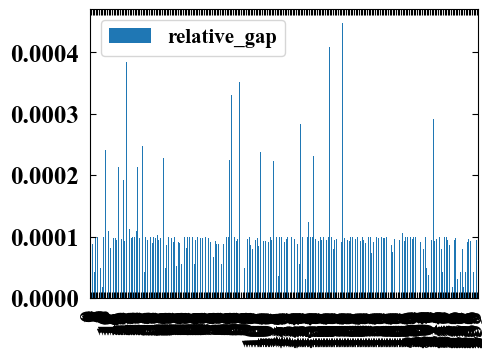

In [13]:
relative_gap(CEM_min_hours_dict).plot(kind='bar')#,label='Label')

In [14]:
emissions_df

Label      emissions
0    ers/CEM_TES_storage140emissions0       0.000000
1     ers/CEM_TES_storage80emissions0       0.000000
2        ers/CEM_storage180emissions0       0.000000
3    ers/CEM_TES_storage180emissions0       0.000000
4     ers/CEM_TES_storage40emissions0       0.000000
..                                ...            ...
235           ers/CEM_base_storage180  216019.441697
236            ers/CEM_base_storage60  216019.441697
237            ers/CEM_TES_storage140  216019.441697
238             ers/CEM_TES_storage80  216019.441697
239             ers/CEM_TES_storage60  216019.441697

[240 rows x 2 columns]

In [17]:
capacity_df[capacity_df.TES>0]

Label         Solar         Wind  Coal  \
0   ers/CEM_TES_storage140emissions0  11147.075985  4030.809740   0.0   
1    ers/CEM_TES_storage80emissions0  11140.619970  4073.449515   0.0   
3   ers/CEM_TES_storage180emissions0  11135.650291  4107.324373   0.0   
4    ers/CEM_TES_storage40emissions0  11140.834190  4072.367955   0.0   
8   ers/CEM_TES_storage200emissions0  11136.384448  4101.986281   0.0   
9    ers/CEM_TES_storage20emissions0  11131.425160  4131.814069   0.0   
11  ers/CEM_TES_storage20emissions10  11141.257142  4070.064383   0.0   
15   ers/CEM_TES_storage60emissions0  11141.465483  4068.813487   0.0   
17  ers/CEM_TES_storage100emissions0  11140.817650  4073.224854   0.0   
18  ers/CEM_TES_storage120emissions0  11142.447142  4064.257938   0.0   
19  ers/CEM_TES_storage160emissions0  11142.127948  4064.037750   0.0   

           TES       Li-ion  
0   362.114901  3221.835869  
1   333.089500  3223.294616  
3   330.020895  3224.524885  
4   338.972874  3223.280232  
8   323.165858  3224.309063  
9   244.705006  3225.130896  
11  353.713241  3223.234669  
15  355.407117  3223.200365  
17  355.156303  3223.360285  
18  371.422960  3223.175351  
19  350.432529  3223.009813

In [18]:
# get the scenarios you want: 
columns_download = ['ers/CEM_TES_storage20emissions0','ers/CEM_TES_storage200emissions0']

def filter_df(df,columns_download,path_download):
    df_filtered = pd.DataFrame(columns=df.columns)
    for label_i in columns_download:
        df_filtered=pd.concat((df[df["Label"] == label_i],df_filtered))
    
    df_filtered.reset_index(drop=True,inplace=True)

    #save
    df_filtered.to_csv(path_download+'.csv')

    return df_filtered



filter_df(curtailment_df,columns_download,'curtailment_sto')
filter_df(syscost_df,columns_download,'syscost_sto')
filter_df(emissions_df,columns_download,'emissions_sto')
filter_df(capacity_df,columns_download,'capacity_sto')


Label         Solar         Wind  Coal  \
0  ers/CEM_TES_storage200emissions0  11136.384448  4101.986281   0.0   
1   ers/CEM_TES_storage20emissions0  11131.425160  4131.814069   0.0   

          TES       Li-ion  
0  323.165858  3224.309063  
1  244.705006  3225.130896